In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc

In [5]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("train.csv", index_col=0)

In [7]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104805 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         84024 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    102056 non-null  float64
dtype

In [74]:
df.shape

(104805, 11)

<AxesSubplot:>

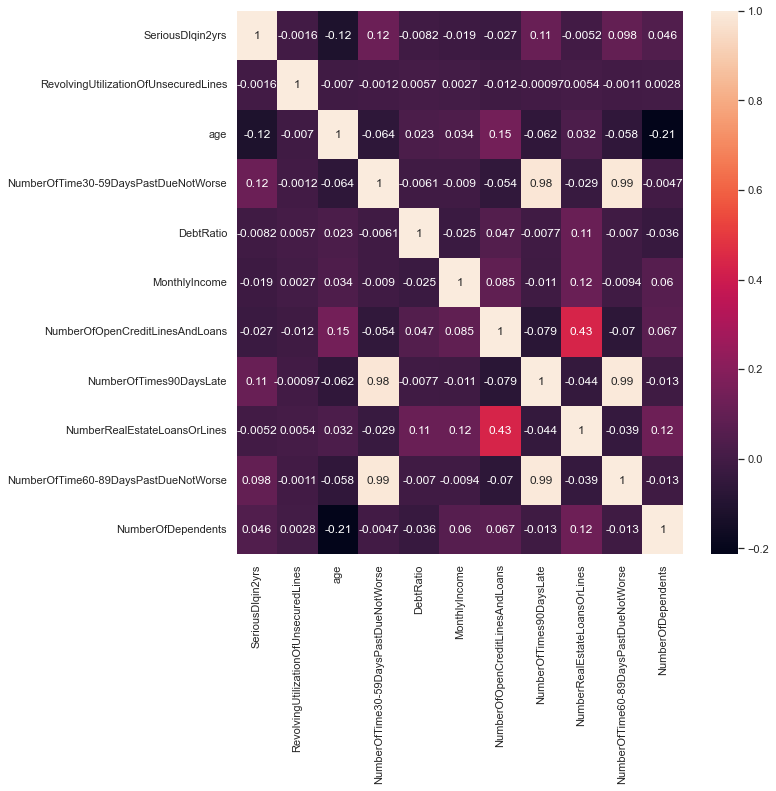

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(), annot=True)

-----------------------------------------------------------------------------------------------------------------

### Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [33]:
Target = 'SeriousDlqin2yrs'
Predictors = df.drop(['SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents'], axis=1)


In [34]:
X = Predictors
y = df[Target]

### 2. Dividir X_train, X_test, y_train, y_test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83844, 8)
(83844,)
(20961, 8)
(20961,)


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score


model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model_gbc.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_gbc, X = X_train, y = y_train, cv = 10,verbose = 1)
y_pred = model_gbc.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % model_gbc.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Gradient Boosting Regression #######
Score : 0.9213


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.0s finished


In [39]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_rfc, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_rfc.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % model_rfc.score(X_test, y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.5s finished



###### Random Forest ######
Score : 0.9321


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
from catboost import CatBoostClassifier

model_cbc = CatBoostClassifier()
model_cbc.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_cbc, X = X_train, y = y_train, cv = 5,verbose = 0)
y_pred = model_cbc.predict(X_test)
print('')
print('###### CatBoost Classifier ######')
print('Score : %.4f' % model_rfc.score(X_test, y_test))

Learning rate set to 0.068274
0:	learn: 0.5963670	total: 42.9ms	remaining: 42.8s
1:	learn: 0.5253947	total: 50.4ms	remaining: 25.1s
2:	learn: 0.4697301	total: 57.9ms	remaining: 19.3s
3:	learn: 0.4218750	total: 65.4ms	remaining: 16.3s
4:	learn: 0.3813034	total: 73.6ms	remaining: 14.6s
5:	learn: 0.3484452	total: 81.7ms	remaining: 13.5s
6:	learn: 0.3172926	total: 89.7ms	remaining: 12.7s
7:	learn: 0.2934856	total: 97.9ms	remaining: 12.1s
8:	learn: 0.2741365	total: 106ms	remaining: 11.6s
9:	learn: 0.2577877	total: 114ms	remaining: 11.3s
10:	learn: 0.2459563	total: 121ms	remaining: 10.9s
11:	learn: 0.2353064	total: 130ms	remaining: 10.7s
12:	learn: 0.2265133	total: 137ms	remaining: 10.4s
13:	learn: 0.2201054	total: 147ms	remaining: 10.3s
14:	learn: 0.2147181	total: 154ms	remaining: 10.1s
15:	learn: 0.2091606	total: 163ms	remaining: 10s
16:	learn: 0.2057477	total: 170ms	remaining: 9.85s
17:	learn: 0.2024621	total: 179ms	remaining: 9.78s
18:	learn: 0.1989428	total: 186ms	remaining: 9.62s
19:	l

In [113]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier()
model_lgb.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_lgb, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_lgb.predict(X_test)
print('')
print('###### LGBMClassifier ######')
print('Score : %.4f' % model_rfc.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished



###### LGBMClassifier ######
Score : 0.9321


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [119]:
X_pred = pd.read_csv("test.csv", index_col = 0)


In [121]:
X_pred.drop(['MonthlyIncome','NumberOfDependents'],axis=1, inplace=True)

In [122]:
X_pred.isnull().values.any()

False

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
# respuestas

In [123]:
predictions_submit = model_lgb.predict(X_pred)
predictions_submit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

**¿De dónde saco `sample_submission.csv`?**

In [140]:
sample = pd.read_csv("sample_submission.csv")

In [141]:
sample

,Id,SeriousDlqin2yrs
0,0,0.778963
1,9,0.590108
2,17,0.046042
3,18,0.753685
4,24,0.577312
...,...,...
45190,149992,0.208370
45191,149994,0.955376
45192,149995,0.362625
45193,149996,0.791524


In [126]:
sample.shape

(45195, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [142]:
submission = pd.DataFrame({"Id": sample['Id'], "SeriousDlqin2yrs": predictions_submit})

In [143]:
submission.head()

,Id,SeriousDlqin2yrs
0,0,0
1,9,0
2,17,0
3,18,0
4,24,0


In [144]:
submission.shape

(45195, 2)

In [145]:
submission['SeriousDlqin2yrs'] = submission['SeriousDlqin2yrs'].astype('float64')

In [146]:
submission.dtypes

Id                    int64
SeriousDlqin2yrs    float64
dtype: object

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [147]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [148]:
chequeator(submission)

You're ready to submit!


In [97]:
submission['SeriousDlqin2yrs'] = submission['SeriousDlqin2yrs'].astype('float64')

In [98]:
sample.dtypes

Id                    int64
SeriousDlqin2yrs    float64
dtype: object

In [99]:
submission.dtypes

Id                    int64
SeriousDlqin2yrs    float64
dtype: object

In [137]:
submission

,Id,SeriousDlqin2yrs
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
45190,45190,0.0
45191,45191,0.0
45192,45192,0.0
45193,45193,0.0
